# Exploratory Data Analysis 
   ### Build data profile tables and plots
   Outliers & Anomalies
   Explore data relationships
   Identification and creation of features

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import random
import os
#load python packages

import datetime
import seaborn as sns

%matplotlib inline

## Import trimmed Data

In [30]:
df = pd.read_csv('Data/BigMartData_output.csv')

In [31]:
df.drop(['Customer Lname','Customer Password',], axis = 1, inplace = True)

keepers = ['Actual_Ship_Days','Days for shipment (scheduled)', 'Delivery_Status','Late_delivery_risk','Category_Id', 'Category Name','Customer State', 'Customer Zipcode', 'Order City','Order Country','Order_Region','Order_State', 'Shipping_Mode','Order_Status']

dff = df[keepers].copy()


## Clean Up Column Headings

In [32]:
dff.rename(columns = {'Days for shipment (scheduled)':'Scheduled_Days_Ship'}, inplace = True)
dff.rename(columns = {'Category Name':'Category_Name', 'Customer State':'Customer_State','Customer Zipcode':'Customer_Zipcode'}, inplace = True)
dff.rename(columns = {'Order City':'Order_City', 'Order State':'Order_State','Order Country':'Order_Country'}, inplace = True)


dff.head(10)

,Actual_Ship_Days,Scheduled_Days_Ship,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_State,Customer_Zipcode,Order_City,Order_Country,Order_Region,Order_State,Shipping_Mode,Order_Status
0,3,4,Advance shipping,0,73,Sporting Goods,PR,725.0,Bekasi,Indonesia,Southeast Asia,Java Occidental,Standard Class,COMPLETE
1,5,4,Late delivery,1,73,Sporting Goods,PR,725.0,Bikaner,India,South Asia,Rajastán,Standard Class,PENDING
2,4,4,Shipping on time,0,73,Sporting Goods,CA,95125.0,Bikaner,India,South Asia,Rajastán,Standard Class,CLOSED
3,3,4,Advance shipping,0,73,Sporting Goods,CA,90027.0,Townsville,Australia,Oceania,Queensland,Standard Class,COMPLETE
4,2,4,Advance shipping,0,73,Sporting Goods,PR,725.0,Townsville,Australia,Oceania,Queensland,Standard Class,PENDING_PAYMENT
5,6,4,Shipping canceled,0,73,Sporting Goods,NY,14150.0,Toowoomba,Australia,Oceania,Queensland,Standard Class,CANCELED
6,2,1,Late delivery,1,73,Sporting Goods,PR,725.0,Guangzhou,China,Eastern Asia,Guangdong,First Class,COMPLETE
7,2,1,Late delivery,1,73,Sporting Goods,FL,33162.0,Guangzhou,China,Eastern Asia,Guangdong,First Class,PROCESSING
8,3,2,Late delivery,1,73,Sporting Goods,PR,725.0,Guangzhou,China,Eastern Asia,Guangdong,Second Class,CLOSED
9,2,1,Late delivery,1,73,Sporting Goods,CA,94583.0,Guangzhou,China,Eastern Asia,Guangdong,First Class,CLOSED


## Order Status Review

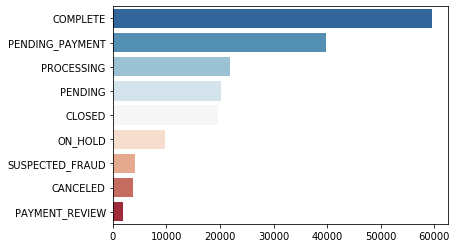

In [33]:
# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(dff.Order_Status.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.Order_Status)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

## Delivery Status Review

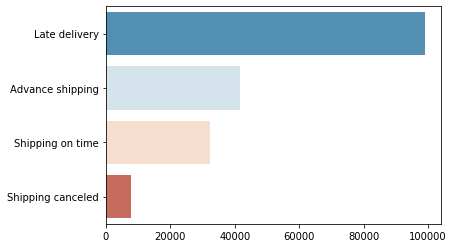

In [34]:
# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df.Delivery_Status.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.Delivery_Status)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

In [43]:
status = ['COMPLETE']
df_late = dff[dff.Order_Status.isin(status)].copy()
df_late.head(10)
df_late.shape


(59491, 14)

## Visualize the Delivery Status of COMPLETED ORDERS
Late Delivery vs Advanced Shipping vs Shipping on Time

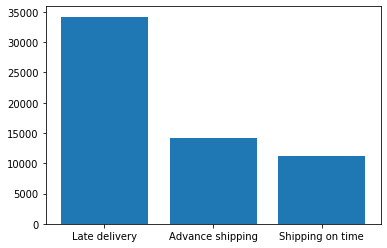

Late delivery       34199
Advance shipping    14136
Shipping on time    11156
Name: Delivery_Status, dtype: int64
(14136, 14)


In [36]:
_= plt.bar(df_late['Delivery_Status'].value_counts().index, (df_late['Delivery_Status'].value_counts()))
plt.show()
del_status_totals = df_late['Delivery_Status'].value_counts()
print(del_status_totals)
total_late = df_late[df_late.Delivery_Status == 'Advance shipping']
print(total_late.shape)


## Visualize Late Deliveries by Region

<function matplotlib.pyplot.show(*args, **kw)>

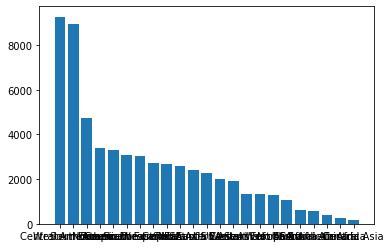

In [37]:
_= plt.bar(df_late['Order_Region'].value_counts().index, (df_late['Order_Region'].value_counts()))
plt.show


In [38]:
print(df_late.nunique())

df_late['Delivery_Status'].isnull().sum()

Actual_Ship_Days          7
Scheduled_Days_Ship       4
Delivery_Status           3
Late_delivery_risk        2
Category_Id              51
Category_Name            50
Customer_State           46
Customer_Zipcode        994
Order_City             3010
Order_Country           151
Order_Region             23
Order_State             976
Shipping_Mode             4
Order_Status              1
dtype: int64


0

Encode Delivery_Status and Hot_encode Order_Region

In [44]:
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 

ship_results = {'Advance shipping': 2, 'Shipping on time': 1, 'Late delivery':0}
df_late['Delivery_Coded']= df_late['Delivery_Status'].apply(set_value, args = (ship_results,))
df_late.head()

,Actual_Ship_Days,Scheduled_Days_Ship,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_State,Customer_Zipcode,Order_City,Order_Country,Order_Region,Order_State,Shipping_Mode,Order_Status,Delivery_Coded
0,3,4,Advance shipping,0,73,Sporting Goods,PR,725.0,Bekasi,Indonesia,Southeast Asia,Java Occidental,Standard Class,COMPLETE,2
3,3,4,Advance shipping,0,73,Sporting Goods,CA,90027.0,Townsville,Australia,Oceania,Queensland,Standard Class,COMPLETE,2
6,2,1,Late delivery,1,73,Sporting Goods,PR,725.0,Guangzhou,China,Eastern Asia,Guangdong,First Class,COMPLETE,0
13,2,1,Late delivery,1,73,Sporting Goods,PR,725.0,Sangli,India,South Asia,Maharashtra,First Class,COMPLETE,0
15,2,1,Late delivery,1,73,Sporting Goods,PR,725.0,Sangli,India,South Asia,Maharashtra,First Class,COMPLETE,0


In [18]:
df_ready = pd.get_dummies(data = df_late, columns = ['Order_Region'], drop_first = True, prefix_sep = "OrdReg")

In [63]:
df_ready.drop(['Delivery_Status'], axis = 1)
df_ready.head()

,Actual_Ship_Days,Scheduled_Days_Ship,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_State,Customer_Zipcode,Order_City,Order_Country,...,Order_RegionOrdRegSouth Asia,Order_RegionOrdRegSouth of USA,Order_RegionOrdRegSoutheast Asia,Order_RegionOrdRegSouthern Africa,Order_RegionOrdRegSouthern Europe,Order_RegionOrdRegUS Center,Order_RegionOrdRegWest Africa,Order_RegionOrdRegWest Asia,Order_RegionOrdRegWest of USA,Order_RegionOrdRegWestern Europe
0,3,4,Advance shipping,0,73,Sporting Goods,PR,725.0,Bekasi,Indonesia,...,0,0,1,0,0,0,0,0,0,0
3,3,4,Advance shipping,0,73,Sporting Goods,CA,90027.0,Townsville,Australia,...,0,0,0,0,0,0,0,0,0,0
6,2,1,Late delivery,1,73,Sporting Goods,PR,725.0,Guangzhou,China,...,0,0,0,0,0,0,0,0,0,0
13,2,1,Late delivery,1,73,Sporting Goods,PR,725.0,Sangli,India,...,1,0,0,0,0,0,0,0,0,0
15,2,1,Late delivery,1,73,Sporting Goods,PR,725.0,Sangli,India,...,1,0,0,0,0,0,0,0,0,0


In [52]:
from sklearn.cluster import KMeans
x = df_ready.drop(['Customer_State','Order_Country','Order_Status','Delivery_Status', 'Category_Name','Order_City','Customer_Zipcode'], axis = 1).values
y = df_ready['Delivery_Coded']

KeyError: 'Delivery_Coded'

In [49]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

ValueError: could not convert string to float: 'COMPLETE'

encode: Delivery Status   2: 'Advanced shipping',  1: 'Shipping on Time' , 0: 'Late Delivery'